In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats
import pingouin as pg
import statsmodels.formula.api as smf

In [53]:
file_path = "data.csv"
df = pd.read_csv(file_path)

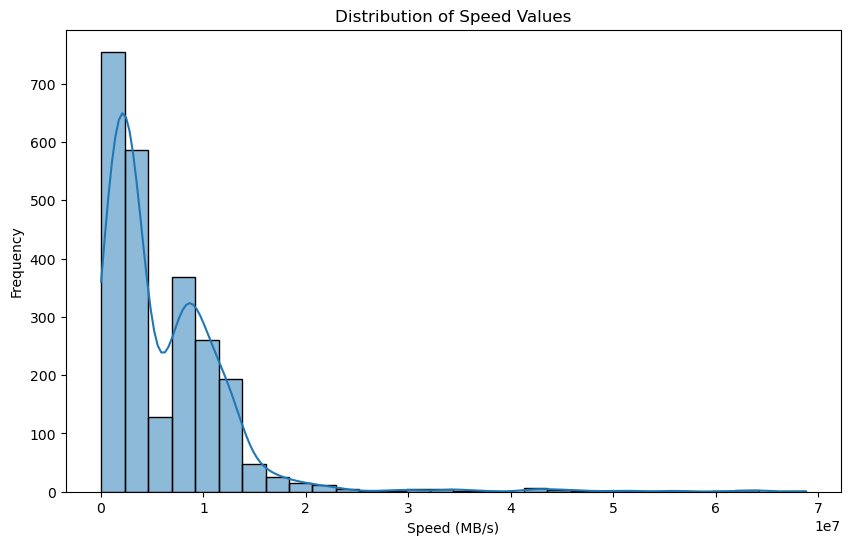

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Speed"], bins=30, kde=True)
plt.title("Distribution of Speed Values")
plt.xlabel("Speed (MB/s)")
plt.ylabel("Frequency")
plt.savefig("distribution.png", dpi=300, bbox_inches="tight")
plt.show()


In [55]:
anova_results = pg.anova(
    dv="Speed", between=["Encryption", "Operation", "Block Size", "File Size"], 
    data=df, detailed=True
)

print(anova_results)

c:\Users\Derven\.conda\envs\disk_en\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 8
  warnings.warn('covariance of constraints does not have full '
c:\Users\Derven\.conda\envs\disk_en\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '
c:\Users\Derven\.conda\envs\disk_en\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 19
  warnings.warn('covariance of constraints does not have full '
c:\Users\Derven\.conda\envs\disk_en\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 8
  warnings.war

                                             Source            SS      DF  \
0                                        Encryption  5.789342e+11     2.0   
1                                         Operation  7.302006e+09     1.0   
2                                        Block Size  1.074584e+16    12.0   
3                                         File Size  7.128087e+15    14.0   
4                            Encryption * Operation -1.210360e+11     2.0   
5                           Encryption * Block Size  4.489429e+13    24.0   
6                            Operation * Block Size  6.485894e+15    12.0   
7                            Encryption * File Size  1.060650e+14    28.0   
8                             Operation * File Size  1.660283e+15    14.0   
9                            Block Size * File Size  2.909843e+16   168.0   
10              Encryption * Operation * Block Size  4.744173e+13    24.0   
11               Encryption * Operation * File Size  1.209732e+14    28.0   

c:\Users\Derven\.conda\envs\disk_en\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 336, but rank is 264
  warnings.warn('covariance of constraints does not have full '


In [56]:
df["Encryption"] = df["Encryption"].astype("category")
df["Operation"] = df["Operation"].astype("category")
df["Block Size"] = df["Block Size"].astype("category")
df["File Size"] = df["File Size"].astype("category")
df['Encryption'] = pd.Categorical(df['Encryption'], categories=['Unencrypted', 'LUKS', 'Veracrypt'], ordered=True)



In [63]:
df = df.rename(columns={"Block Size": "Block_Size", "File Size": "File_Size"})
formula = "Speed ~ Encryption + Operation + Encryption:Operation  + C(Block_Size) + C(File_Size) "
model = smf.mixedlm(formula, data=df, groups=df["Trial"])
result = model.fit()
print(result.summary())

                                     Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                Speed              
No. Observations:                 2430                   Method:                            REML               
No. Groups:                       3                      Scale:                             20864689284414.5938
Min. group size:                  810                    Log-Likelihood:                    -40259.4223        
Max. group size:                  810                    Converged:                         Yes                
Mean group size:                  810.0                                                                        
---------------------------------------------------------------------------------------------------------------
                                                Coef.        Std.Err.     z    P>|z|     [0.025       0.975]   
-----------------------------

In [64]:
results_df = pd.DataFrame({
    "Coefficient": result.params,
    "Std_Err": result.bse,
    "z_value": result.tvalues,   # In MixedLM, tvalues are used as z-values
    "p_value": result.pvalues
})

results_df.to_csv("model_coefficients.csv", index=True)